In [1]:
from my_tree import *
from random import *
import sympy
import numpy as np
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from algorithm import algorithm
from BFS import *
import Rotations
from placement import *
from r_utils import *

[0, 1, 2, 3, 4, 5]
[(0, 5), (0, 4), (0, 3), (0, 2), (1, 5), (1, 4), (1, 3), (1, 2)]


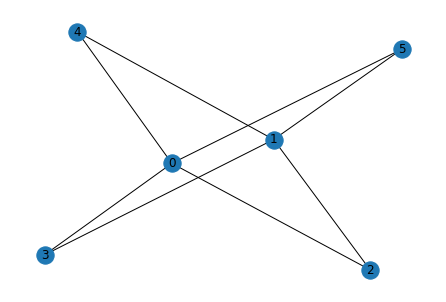

In [38]:
dimension = 6
edges = [(0,5, {"delta_m":0, "sensitivity": 1}),
         (0,4, {"delta_m":0, "sensitivity": 1}),
         (0,3, {"delta_m":1, "sensitivity": 3}),
         (0,2, {"delta_m":1, "sensitivity": 3}),
         (1,5, {"delta_m":0, "sensitivity": 1}),
         (1,4, {"delta_m":0, "sensitivity": 1}),
         (1,3, {"delta_m":1, "sensitivity": 3}),
         (1,2, {"delta_m":1, "sensitivity": 3})
         ] 

i_placement = level_Graph(edges, dimension)
print(i_placement.nodes)
print(i_placement.edges)
nx.draw(i_placement, with_labels = True)

In [42]:

def update_list(lst, num_a, num_b):
    new_lst = []

    mod_index =[]
    for i, t in enumerate(lst):
        
        tupla =[0,0]
        if(t[0] == num_a):
            tupla[0] = 1
        elif(t[0]==num_b):
            tupla[0] = 2
            
        if (t[1] == num_a):
            tupla[1] = 1
        elif (t[1] == num_b):
            tupla[1] = 2

        mod_index.append(tupla)

    for i, t in enumerate(lst):
        substituter = list(t)
        
        if(mod_index[i][0]== 1):
            substituter[0] = num_b
        elif(mod_index[i][0]== 2):
            substituter[0] = num_a
        
        if(mod_index[i][1]== 1):
            substituter[1] = num_b
        elif(mod_index[i][1]== 2):
            substituter[1] = num_a
            
        new_lst.append( tuple(substituter) )
    
    return new_lst 

def swap_nodes(G , node_a, node_b):

    edges = list(G.edges)
    nodes = list(G.nodes)

    attribute_list = []
    for e in edges:
        attribute_list.append( G.get_edge_data(*e) )

    swapped_nodes_edges = update_list(edges, node_a, node_b)
    
    new_edge_list=[]
    for i, e in enumerate(swapped_nodes_edges):
        new_edge_list.append((*e, attribute_list[i]))

    print(new_edge_list)
    return level_Graph(new_edge_list, len(nodes) )


In [43]:
print(i_placement.edges)
i_placement = swap_nodes(i_placement , 1, 4)
print(i_placement.edges)

[(0, 5), (0, 1), (0, 3), (0, 2), (1, 4), (2, 4), (3, 4), (4, 5)]
[(0, 5, {'delta_m': 0, 'sensitivity': 1}), (0, 4, {'delta_m': 0, 'sensitivity': 1}), (0, 3, {'delta_m': 1, 'sensitivity': 3}), (0, 2, {'delta_m': 1, 'sensitivity': 3}), (4, 1, {'delta_m': 0, 'sensitivity': 1}), (2, 1, {'delta_m': 1, 'sensitivity': 3}), (3, 1, {'delta_m': 1, 'sensitivity': 3}), (1, 5, {'delta_m': 0, 'sensitivity': 1})]
[(0, 5), (0, 4), (0, 3), (0, 2), (1, 4), (1, 2), (1, 3), (1, 5)]


[0, 1, 2, 3, 4, 5]


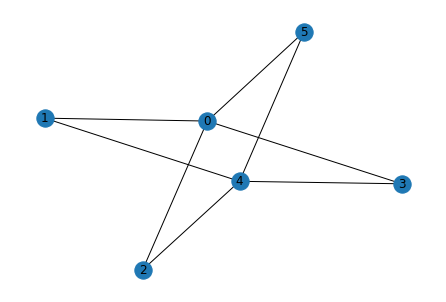

In [41]:
print(i_placement.nodes)
nx.draw(i_placement, with_labels = True)

In [4]:
R1 = Rotations.R(np.pi/5,np.pi/5,0,5,6)
R2 = Rotations.R(np.pi/5,np.pi/5,1,5,6)
R3 = Rotations.R(np.pi/5,np.pi/5,1,2,6)

In [5]:
print(R1)
print("########")
print(R2)
print("########")
print(R3)
print("########")

[[ 0.95105652+0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.25      -0.18163563j]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          1.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          1.        +0.j          0.        +0.j        ]
 [-0.25      -0.18163563j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.95105652+0.j        ]]
########
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 

In [6]:
Homemade = matmul(R3.dag ,R2.dag)
Homemade = matmul(Homemade.conj().T, R1.dag)

In [9]:
print(str(Homemade))
U = Rotations.custom_Unitary(Homemade, dimension)

[[ 0.95105652+0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j         -0.25      +0.18163563j]
 [ 0.0954915 +0.j          0.9045085 +0.j          0.23776413-0.17274575j
   0.        +0.j          0.        +0.j          0.23776413-0.17274575j]
 [ 0.        +0.j         -0.25      -0.18163563j  0.95105652+0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          1.        +0.j          0.        +0.j        ]
 [ 0.23776413+0.17274575j -0.23776413-0.17274575j -0.0954915 +0.j
   0.        +0.j          0.        +0.j          0.9045085 +0.j        ]]


In [8]:
decomp_alg, cost_limit = algorithm( Homemade , i_placement )

dimension is 6
 r is 1
 c is 0
0.2001406547348498
-0.0
[[ 0.9511+0.j      0.    +0.j      0.    +0.j      0.    +0.j
   0.    +0.j     -0.25  +0.1816j]
 [ 0.0955+0.j      0.9045+0.j      0.2378-0.1727j  0.    +0.j
   0.    +0.j      0.2378-0.1727j]
 [ 0.    +0.j     -0.25  -0.1816j  0.9511+0.j      0.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j      0.    +0.j      0.    +0.j      1.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j      0.    +0.j      0.    +0.j      0.    +0.j
   1.    +0.j      0.    +0.j    ]
 [ 0.2378+0.1727j -0.2378-0.1727j -0.0955+0.j      0.    +0.j
   0.    +0.j      0.9045+0.j    ]]
---
[[ 0.9558+0.j      0.0904+0.j      0.0238-0.0173j  0.    +0.j
   0.    +0.j     -0.225 +0.1635j]
 [ 0.    +0.j      0.9   +0.j      0.2366-0.1719j  0.    +0.j
   0.    +0.j      0.2616-0.19j  ]
 [ 0.    +0.j     -0.25  -0.1816j  0.9511+0.j      0.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j      0.    +0.j      0.    +0.j      1.    +0.j
   0.

In [68]:
TREE = N_ary_Tree()
TREE.add(0, np.identity(dimension ,dtype='complex'), Homemade, 0, cost_limit)


BFS(TREE.root)

print(TREE.print_tree(TREE.root,"ZIOBELLO"))

valid: 6
not_diag: 8
dimension is 6
checking level
-------------------------------------------------------------------------
 r is 0
 r2 is 1
 c is 0
theta  : 0.2001406547348498
phi  : -0.0
number of non-zeros  :15
estimated_cost   :0.12477800617720496
-------------------------------------------------------------------------
 LA NEW KEY IS : 1
-------------------------------------------------------------------------
 r is 0
 r2 is 5
 c is 0
theta  : 0.5994171995371125
phi  : 0.6283185307179586
number of non-zeros  :15


NodeNotFound: Either source 0 or target 5 is not in G